<a href="https://colab.research.google.com/github/hongchen-wang/ML-QuantitativeTrading/blob/main/QuantitativeTrading_supervised_media_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Twitter Sentiment Investing Strategy**

In [ ]:
#1. Load Twitter Sentiment Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
import io
plt.style.use('ggplot')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_data.csv to sentiment_data.csv


In [ ]:
import io
sentiment_df = pd.read_csv(io.BytesIO(uploaded['sentiment_data.csv']))
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df


,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


In [ ]:
sentiment_df = sentiment_df.set_index(['date', 'symbol'])
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

In [ ]:
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

# determine a threshold for the min likes and comments
sentiment_df = sentiment_df[(sentiment_df['twitterLikes'] > 20) & (sentiment_df['twitterComments'] > 10)]
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

2. Aggregate monthly and calculate average sentiment for the month

In [ ]:
# average in one month
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])[['engagement_ratio']].mean())
aggragated_df

engagement_ratio
date       symbol                  
2021-11-30 AAL             0.203835
           AAPL            0.256318
           ABBV            0.244677
           ABT             0.313368
           AES             0.864613
...                             ...
2023-01-31 TMO             0.333313
           TSLA            0.151992
           TSN             0.280553
           V               0.194045
           XOM             0.217904

[1109 rows x 1 columns]

In [ ]:
aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio'].transform(lambda x: x.rank(ascending=False)))
aggragated_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

3. select top 5 stocks based on cross-sectional ranking for each month

In [ ]:
filtered_df = aggragated_df[aggragated_df['rank'] <6].copy()
filtered_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
...                             ...   ...
2023-01-31 A               0.471572   5.0
           AES             0.533809   4.0
           BIIB            0.839303   1.0
           FCX             0.667387   3.0
           MDT             0.806841   2.0

[75 rows x 2 columns]

In [ ]:
filtered_df = filtered_df.reset_index(level = 1)
filtered_df

,symbol,engagement_ratio,rank
date,,,
2021-11-30,AES,0.864613,2.0
2021-11-30,FCX,0.626323,5.0
2021-11-30,MNST,0.699721,3.0
2021-11-30,OXY,2.147741,1.0
2021-11-30,SLB,0.647374,4.0
...,...,...,...
2023-01-31,A,0.471572,5.0
2023-01-31,AES,0.533809,4.0
2023-01-31,BIIB,0.839303,1.0


In [ ]:
filtered_df.index = filtered_df.index + pd.DateOffset(1)
filtered_df

,symbol,engagement_ratio,rank
date,,,
2021-12-01,AES,0.864613,2.0
2021-12-01,FCX,0.626323,5.0
2021-12-01,MNST,0.699721,3.0
2021-12-01,OXY,2.147741,1.0
2021-12-01,SLB,0.647374,4.0
...,...,...,...
2023-02-01,A,0.471572,5.0
2023-02-01,AES,0.533809,4.0
2023-02-01,BIIB,0.839303,1.0


In [ ]:
filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])
filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

4. Extract the stocks to form portfolios with at the start of each new month

In [ ]:
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}

for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

5.Download fresh stock prices for only selected/shortlisted stocks

In [ ]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()
prices_df = yf.download(tickers=stocks_list, start='2021-01-01', end='2023-03-01')

[*********************100%%**********************]  85 of 85 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Price        Adj Close                                                         \
Ticker               A    AAL         AAP        AAPL        ABBV         ABT   
Date                                                                            
2021-01-04  115.980743  15.13  144.788605  126.830078   90.489517  102.054947   
2021-01-05  116.928978  15.43  144.632141  128.398178   91.425217  103.317635   
2021-01-06  120.135475  15.52  152.987823  124.076096   90.635437  103.102524   
2021-01-07  123.332161  15.38  154.294556  128.309982   91.605499  104.103340   
2021-01-08  124.212006  15.13  156.493851  129.417450   92.086212  104.393280   
...                ...    ...         ...         ...         ...         ...   
2023-02-22  140.565445  15.56  139.062653  147.918762  142.166779   99.620422   
2023-02-23  141.673508  15.87  137.503708  148.405487  143.487778   99.484596   
2023-02-24  139.694839  15.56  134.444000  145.733398  144.091660   97.457077   
2023-02-27  140.664383  15.63  136.167511  146.935349  145.573044   96.787682   
2023-02-28  140.456635  15.98  140.360123  146.428757  145.214493   98.679398   

Price                                                    ...   Volume  \
Ticker            AEP        AES         ALB        AMD  ...      RCL   
Date                                                     ...            
2021-01-04  71.591942  20.939247  148.095840  92.300003  ...  5732800   
2021-01-05  71.495361  21.642027  158.089828  92.769997  ...  4029500   
2021-01-06  72.066071  22.506985  169.898300  90.330002  ...  3612500   
2021-01-07  70.143250  22.281738  178.533905  95.160004  ...  3993700   
2021-01-08  69.519852  22.903431  178.630951  94.580002  ...  3104200   
...               ...        ...         ...        ...  ...      ...   
2023-02-22  86.226349  24.251102  242.647415  76.610001  ...  2044600   
2023-02-23  86.121910  24.251102  249.933243  79.750000  ...  2066600   
2023-02-24  85.856079  24.184244  245.670044  78.089996  ...  2875100   
2023-02-27  85.514282  23.763981  253.054321  78.769997  ...  2459700   
2023-02-28  83.520515  23.572952  250.386139  78.580002  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                           
Ticker             V       XOM  
Date                            
2021-01-04  10318300  27764700  
2021-01-05   6869700  44035100  
2021-01-06   7206200  36484800  
2021-01-07  10967900  29528100  
2021-01-08   6513000  28628200  
...              ...       ...  
2023-02-22   4621800  13973800  
2023-02-23   5533800  11289400  
2023-02-24   4414400  14351000  
2023-02-27   4255300  11710500  
2023-02-28   5385400  18107000  

[542 rows x 510 columns]

6. Calculate Portfolio Returns with monthly rebalancing

In [ ]:
returns_df = np.log(prices_df['Adj Close']).diff()


""


In [ ]:
portfolio_df = pd.DataFrame()
for start_date in fixed_dates.keys():
   end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
   cols = fixed_dates[start_date]

   temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
   portfolio_df = pd.concat([portfolio_df, temp_df], axis = 0)

portfolio_df


,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


7. Download NASDAQ/QQQ prices and calculate returns to compare to our strategy
(Attention to the survivial bias)

In [ ]:
qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')

qqq_return = np.log(qqq_df['Adj Close']).diff().to_frame('qqq_return')
portfolio_df = portfolio_df.merge(qqq_return, left_index=True, right_index=True)
portfolio_df

[*********************100%%**********************]  1 of 1 completed


,portfolio_return,qqq_return
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


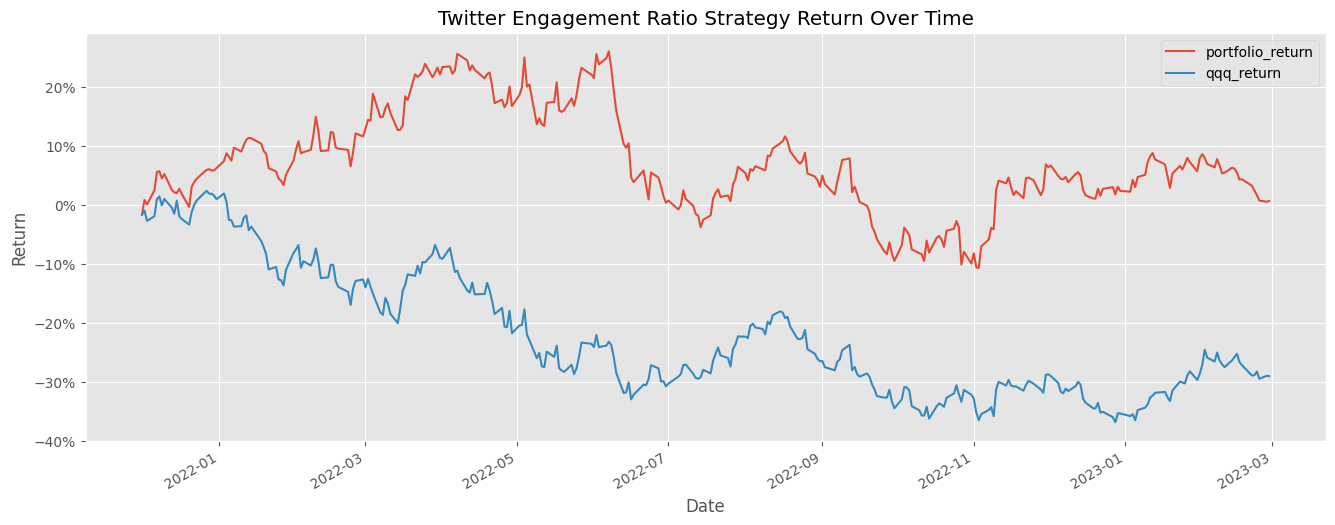

In [ ]:
#visualization
import matplotlib.ticker as mtick

portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)
portfolios_cumulative_return.plot(figsize=(16, 6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.xlabel('Date')
plt.show()